# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

--------------------------------------------------
Model: Linear Discriminant Analysis
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

--------------------------------------------------
Model: SVM (Linear Kernel)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00  

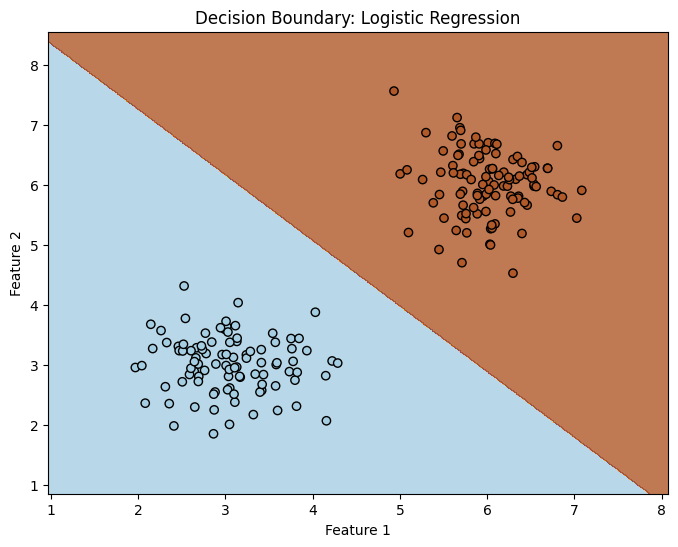

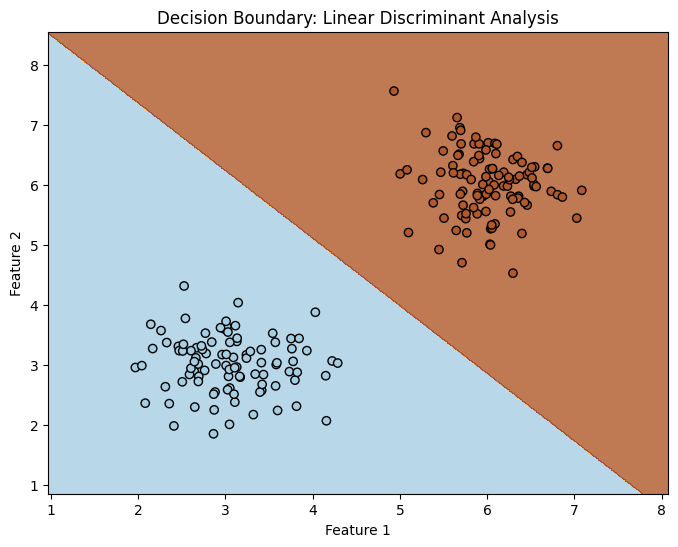

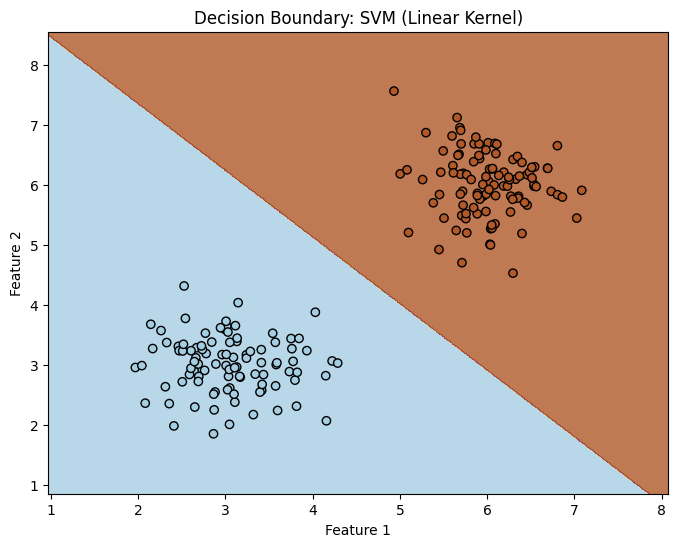

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/misha/Desktop/Ad-labs-2024/lab-2/first_test_dataset_numpy')
X = data[["x", "y"]].values
y = data["class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "SVM (Linear Kernel)": SVC(kernel="linear")
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"Decision Boundary: {name}")


**Аналіз отриманих результатів**:

1.   Усі три моделі (Логістична регресія, LDA, SVM) показали ідеальну продуктивність (точність, повнота, F1-міра — 1.0), оскільки дані є лінійно роздільними.
2.   Межі класифікації побудовано чітко, без жодних помилок у прогнозах. 
3.   Для задач із лінійно роздільними даними всі три моделі є однаково ефективними, але логістична регресія найшвидша для реального використання.
4.  Для складніших даних можна використовувати моделі з нелінійними підходами, як-от SVM з нелінійним ядром.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.84      0.88      0.86        56
           2       0.92      0.91      0.91        64

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180

--------------------------------------------------
Model: SVM (RBF Kernel)
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        60
           1       0.82      0.89      0.85        56
           2       0.92      0.88      0.90        64

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180

--------------------------------------------------
Model: K-Nearest Neighbors (KNN)
              precision    recall  f1-score   suppor

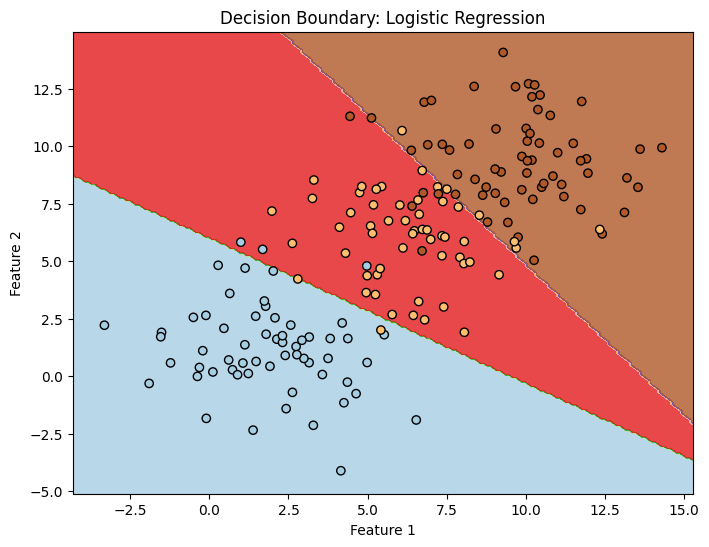

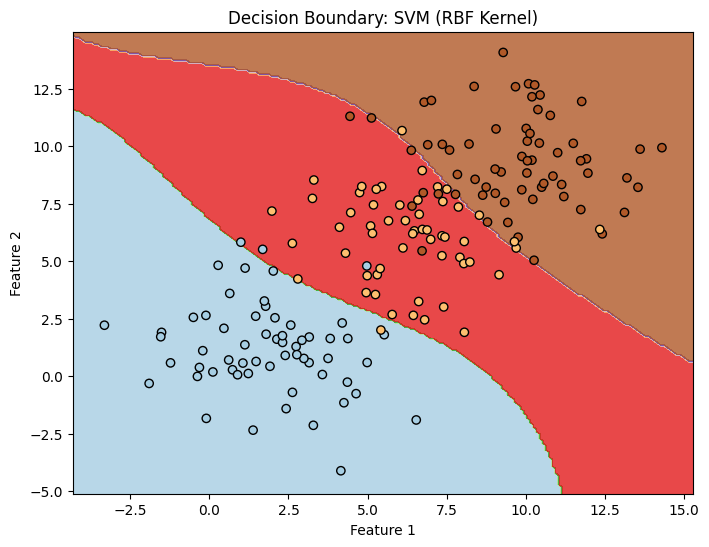

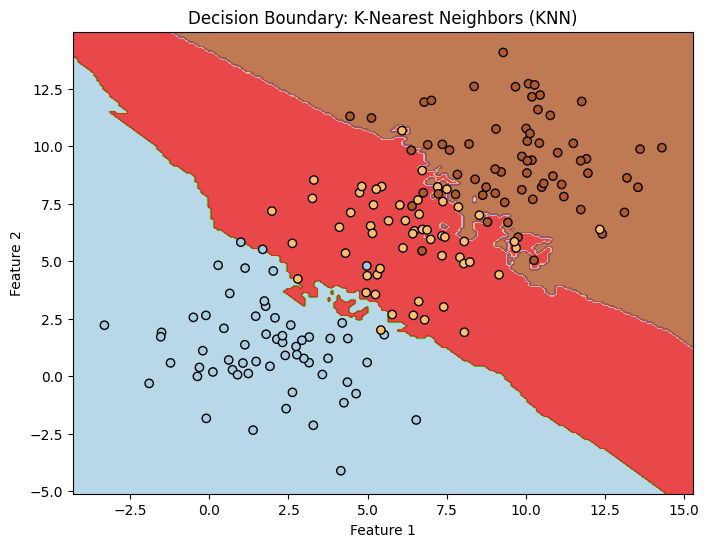

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/misha/Desktop/Ad-labs-2024/lab-2/second_test_dataset')
X = data[["x", "y"]].values
y = data["class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"Decision Boundary: {name}")


**Аналіз отриманих результатів**:

1.   моделі показали різні результати на даних із частковим перекриттям класів: логістична регресія працює гірше через лінійність, тоді як SVM із RBF-ядром демонструє кращу адаптацію до складних меж..
2.   KNN добре справляється з локальними структурами, але може бути чутливим до вибору кількості сусідів.
3.   перекриття класів ускладнює точну класифікацію, і нелінійні підходи, як SVM, краще враховують ці особливості.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

Model: SVM (RBF Kernel)
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.98      0.97      0.97       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       100
           1       0.96      0.94      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

--------------------------------------------------
Model: K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.97      0.98      0.98       100

  

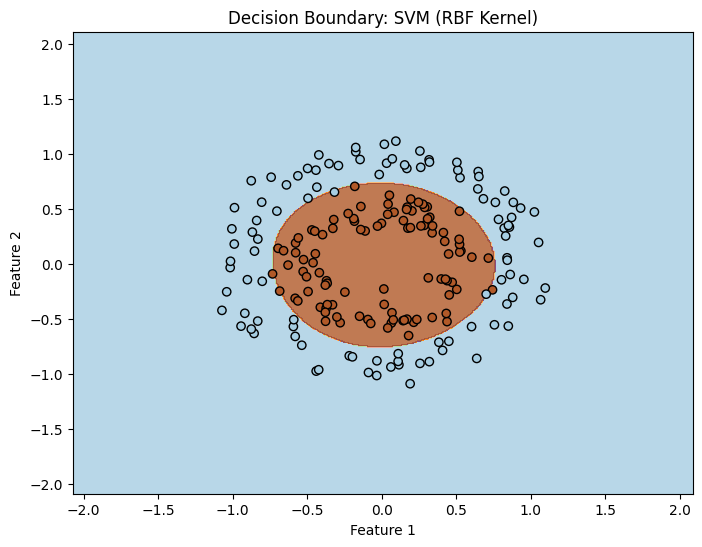

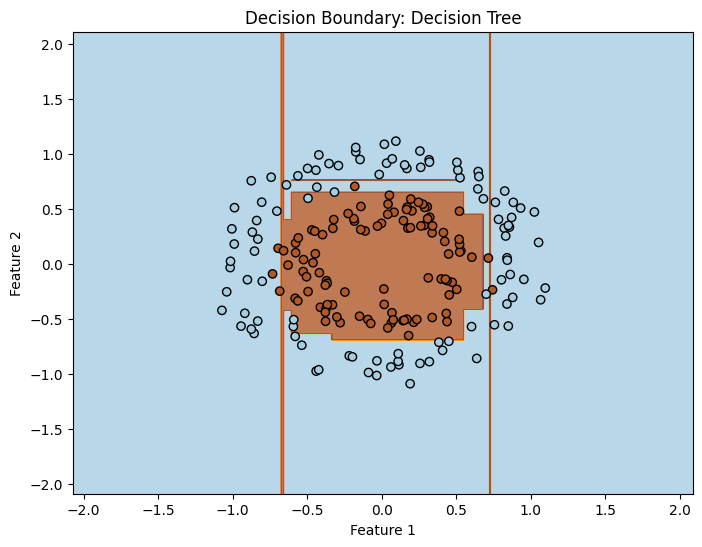

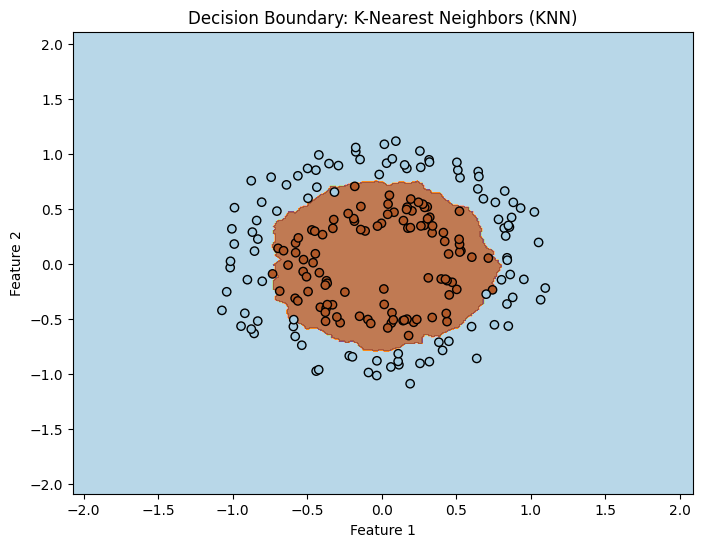

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"Decision Boundary: {name}")


**Аналіз отриманих результатів**:

1.   SVM із RBF ядром найкраще адаптується до складної топології даних, оскільки може створювати нелінійні межі
2.   Дерево рішень добре враховує складність геометрії, але його рішення може бути надмірно подрібненим.
3.   KNN також ефективний, але його продуктивність залежить від кількості сусідів і локального розподілу даних.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

Model: SVM (RBF Kernel)
              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76        96
         1.0       0.82      0.64      0.72       104

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200

--------------------------------------------------
Model: Neural Network (MLP)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        96
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

--------------------------------------------------
Model: K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        96
         1.0       1.00      1.00      1.00       

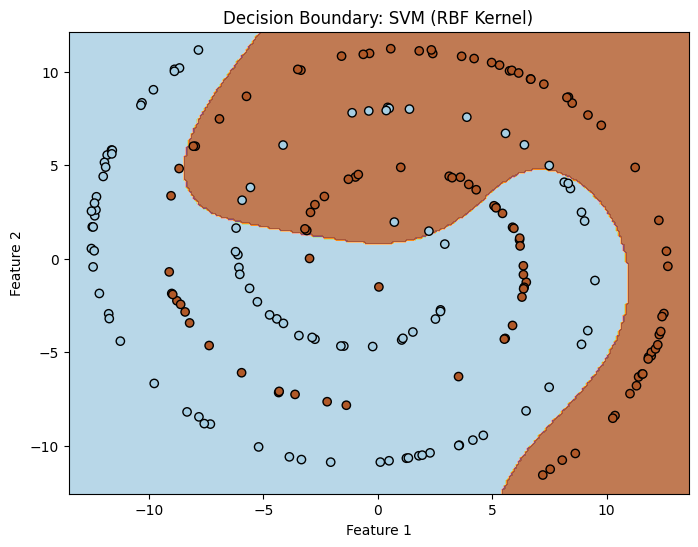

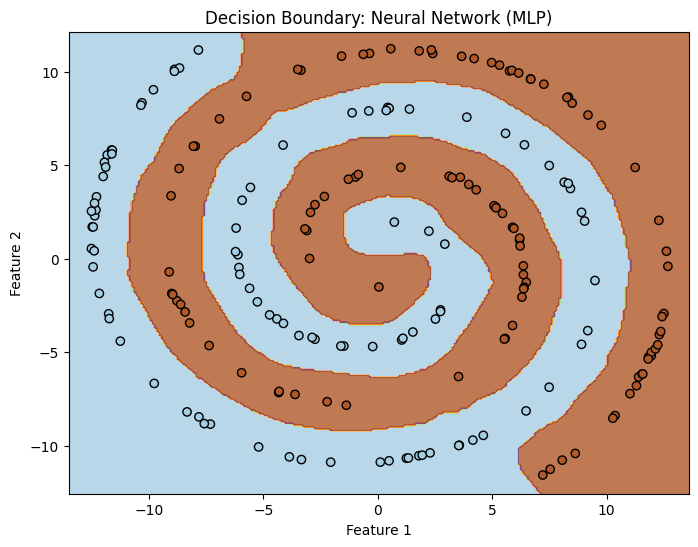

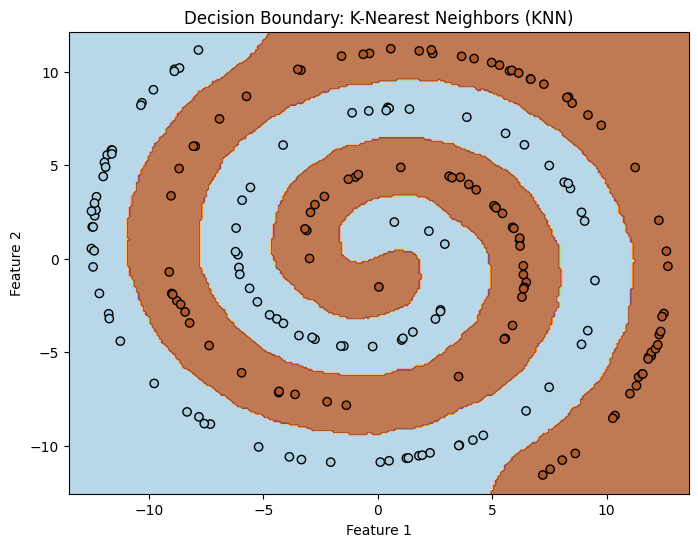

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def generate_double_spiral(n_points, noise=0.1):
    n = np.sqrt(np.random.rand(n_points)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points) * noise
    d2x = np.cos(n) * n + np.random.rand(n_points) * noise
    d2y = -np.sin(n) * n + np.random.rand(n_points) * noise
    X = np.vstack((np.hstack((d1x, d2x)), np.hstack((d1y, d2y)))).T
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    return X, y

X, y = generate_double_spiral(500, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "SVM (RBF Kernel)": SVC(kernel="rbf", probability=True),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"Decision Boundary: {name}")


**Аналіз отриманих результатів**:

1.   Для класифікації подвійної спіралі нелінійні моделі, такі як SVM із RBF-ядром або нейронні мережі, показують кращі результати завдяки здатності адаптуватися до складних залежностей.
2.   Локальні методи, як KNN, працюють добре в окремих областях, але можуть давати більше помилок у задачах із глобальною складністю. 
3.   Нелінійність даних значно ускладнює задачу, тому важливо використовувати моделі, які здатні враховувати ці особливості.